# Naturally Racially Occurring Bias in AIs
// Reported on **September 20th, 2017**<br/>
// Status: **[Turned To Service](https://pengra.github.com/data/compas)**

This simple lab takes a look at all the jail inmates of Broward County Jail and their COMPASS Scores. COMPASS is an AI, and it rates them on three things:

- risk to commit violence
- risk of recidivism
- risk of failing to appear for court

One of the questions I discussed in an old paper, was whether AIs could be racially biased. I recently put the COMPASS data on my personal data API and conducted the same experiments.

In [35]:
import requests
import json
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [36]:
API = "https://data.pengra.io/compas/?page="

def get_assessment_data(page):
    response = requests.get(API + str(page))
    if response.ok:
        api_response = response.json()
        next_page = api_response['next']
        if next_page:
            next_page = next_page.split("page=")[1]
        results = api_response['results']
        return (next_page, results)
    raise ValueError("Invalid Page:", page)

In [60]:
def plot_scores(assessments):
    violence_scores = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    recidivism_scores = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    fail_to_appear_scores = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    supervision_level_scores = [0, 0, 0, 0, 0]
    
    for assessment in assessments:
        v_score = assessment.get('violence_score')
        r_score = assessment.get('recidivism_score')
        f_score = assessment.get('fail_to_appear_score')
        s_score = assessment.get('supervision_level')
        if v_score is None:
            v_score = 0
        if r_score is None:
            r_score = 0
        if f_score is None:
            f_score = 0
        if s_score is None:
            s_score = 0

        violence_scores[v_score] += 1
        recidivism_scores[r_score] += 1
        fail_to_appear_scores[f_score] += 1
        supervision_level_scores[s_score] += 1
    
    for scores, title, length in [
        (violence_scores, "Risk of Violence", 11), 
        (recidivism_scores, "Risk of Recidivism", 11), 
        (fail_to_appear_scores, "Risk of Failure to Appear", 11),
        (supervision_level_scores, "Supervision Recomendation", 5)
    ]:
        graph = plt.figure()
        thisbar = graph.add_subplot(111)
        thisbar.set_title(title)
        thisbar.bar([str(_) for _ in range(1, length)], scores[1:], width=(1/1.5), color="#ff8f3f")

## Assessment overviews

In [61]:
DATA = []

page = 1
while page:
    page, assessment = get_assessment_data(page)
    DATA += assessment
print("log size: {} entries".format(len(DATA)))

log size: 1460 entries


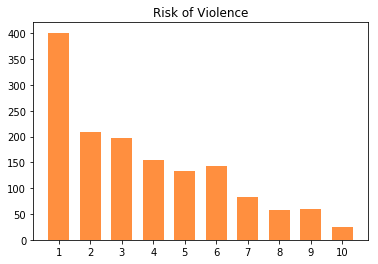

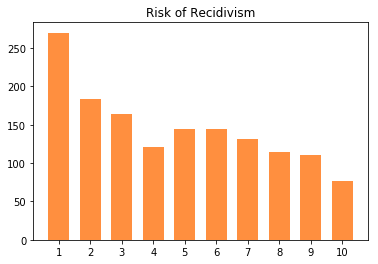

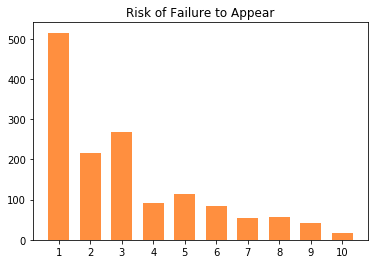

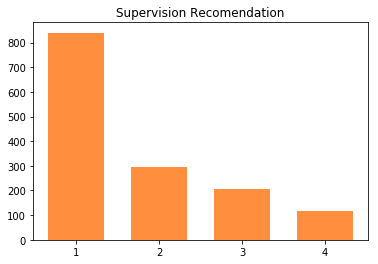

In [62]:
plot_scores(DATA)

## Assessments by Race

In [24]:
AFRICAN_AMERICAN_DATA = []
for log in DATA:
    if log['inmate_ethnicity'] == 'african-american':
        AFRICAN_AMERICAN_DATA.append(log)
print("log size: {} ({}%) entries".format(len(AFRICAN_AMERICAN_DATA), len(AFRICAN_AMERICAN_DATA) * 100 // len(DATA)))

log size: 710 (48%) entries


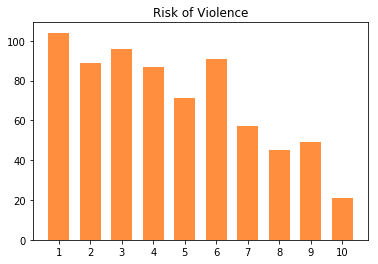

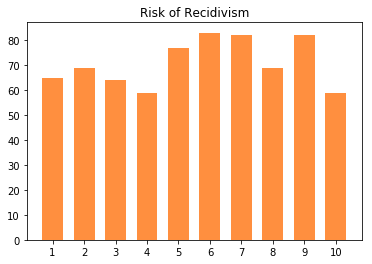

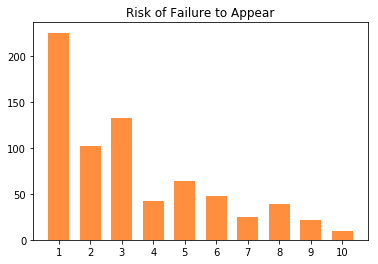

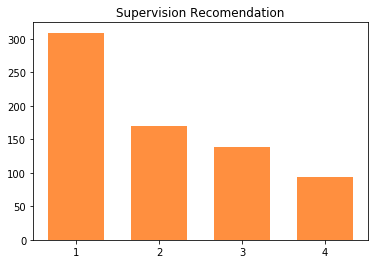

In [63]:
plot_scores(AFRICAN_AMERICAN_DATA)

In [25]:
CAUCASIAN_DATA = []
for log in DATA:
    if log['inmate_ethnicity'] == 'caucasian':
        CAUCASIAN_DATA.append(log)
print("log size: {} ({}%) entries".format(len(CAUCASIAN_DATA), len(CAUCASIAN_DATA) * 100 // len(DATA)))

log size: 503 (34%) entries


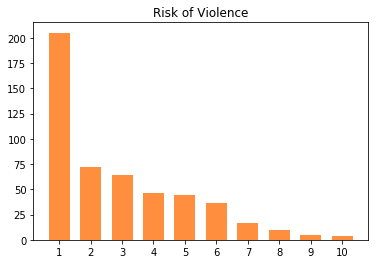

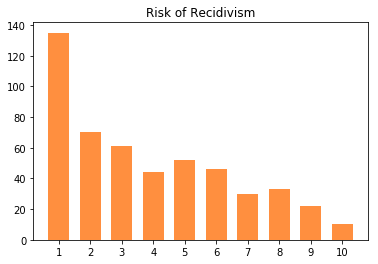

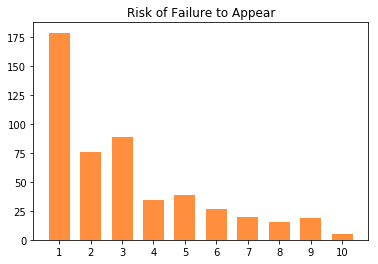

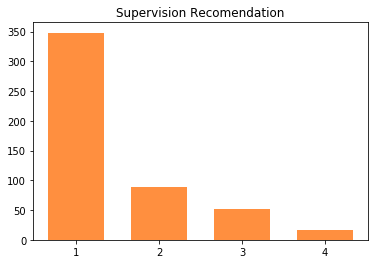

In [64]:
plot_scores(CAUCASIAN_DATA)

In [27]:
ASIAN_DATA = []
for log in DATA:
    if log['inmate_ethnicity'] == 'asian':
        ASIAN_DATA.append(log)
print("log size: {} ({}%) entries".format(len(ASIAN_DATA), len(ASIAN_DATA) * 100 // len(DATA)))

log size: 7 (0%) entries


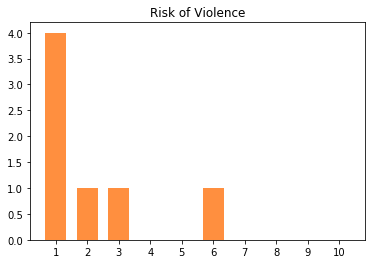

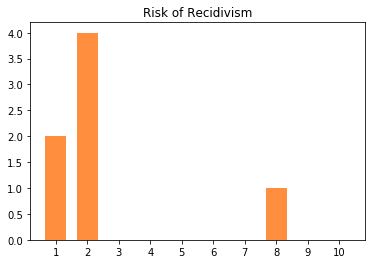

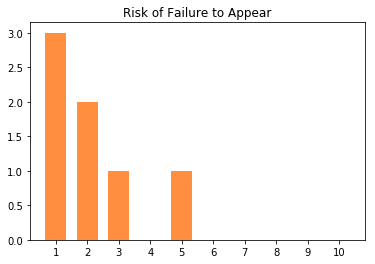

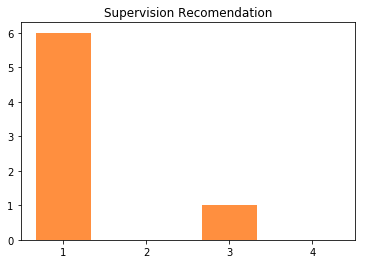

In [65]:
plot_scores(ASIAN_DATA)

In [28]:
OTHER_DATA = []
for log in DATA:
    if log['inmate_ethnicity'] == 'other':
        OTHER_DATA.append(log)
print("log size: {} ({}%) entries".format(len(OTHER_DATA), len(OTHER_DATA) * 100 // len(DATA)))

log size: 63 (4%) entries


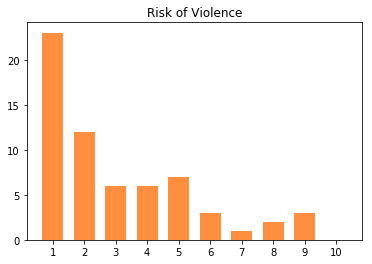

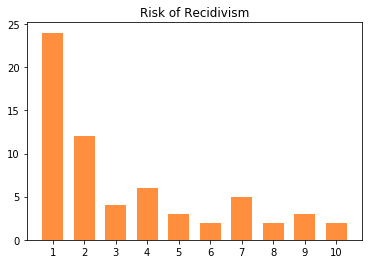

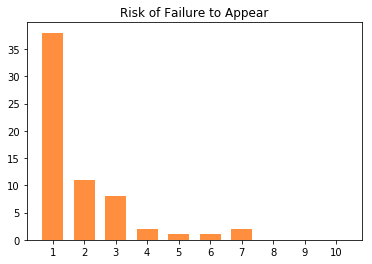

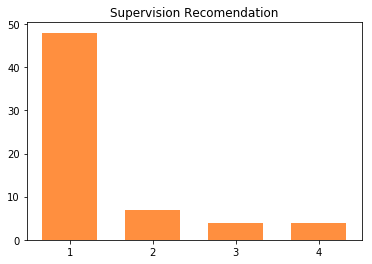

In [67]:
plot_scores(OTHER_DATA)

# Conclusion

The distribution of scores for every race other than African Americans were mostly low scores. African American scores wree more evenly distributed between all scores. This data suggests that not only are African Americans in Broward County placed into jails at a higher rate, they're also deemed to be a higher risk; thus more likely to be locked up longer.